In [3]:
!pip install quandl

  Running setup.py bdist_wheel for inflection: started
  Running setup.py bdist_wheel for inflection: finished with status 'done'
  Stored in directory: C:\Users\chava\AppData\Local\pip\Cache\wheels\9f\5a\d3\6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [12]:
import quandl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [56]:
df= quandl.get("SSE/PAT", authtoken="AgFnU5Cp6tYvtzj5exy5")

In [57]:
df.head()

,High,Low,Last,Previous Day Price,Volume
Date,,,,,
2018-03-26,18.27,17.95,17.95,18.30,1880.0
2018-03-27,18.49,18.00,18.49,17.95,4455.0
2018-03-28,18.20,17.98,18.02,18.49,3700.0
2018-03-29,18.14,17.99,18.03,18.02,0.0
2018-04-03,18.08,17.84,18.03,18.03,1000.0


In [40]:
print(df.apply(lambda x:sum(x.isnull()),axis=0))

High                  0
Low                   0
Last                  0
Previous Day Price    0
Volume                0
dtype: int64


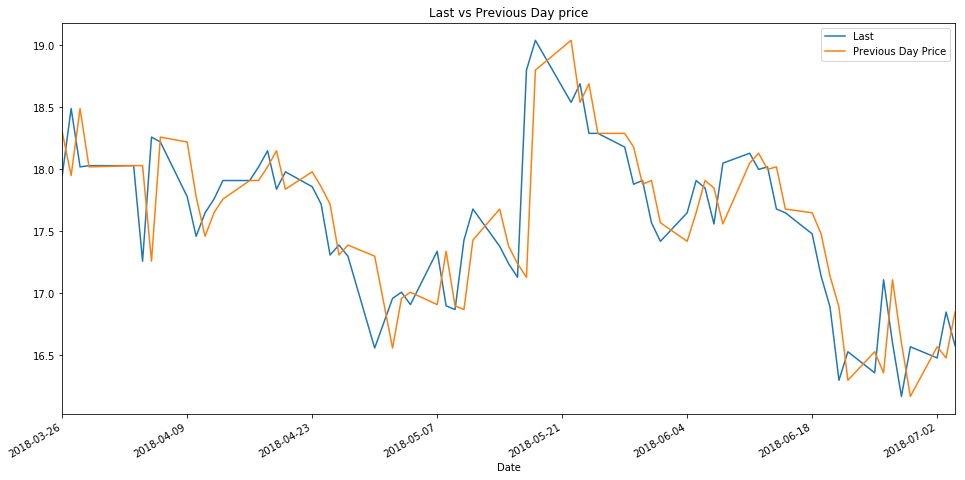

In [46]:
df['Last'].plot(figsize = (16,8), title = 'Last vs Previous Day price')
df['Previous Day Price'].plot()
plt.legend();

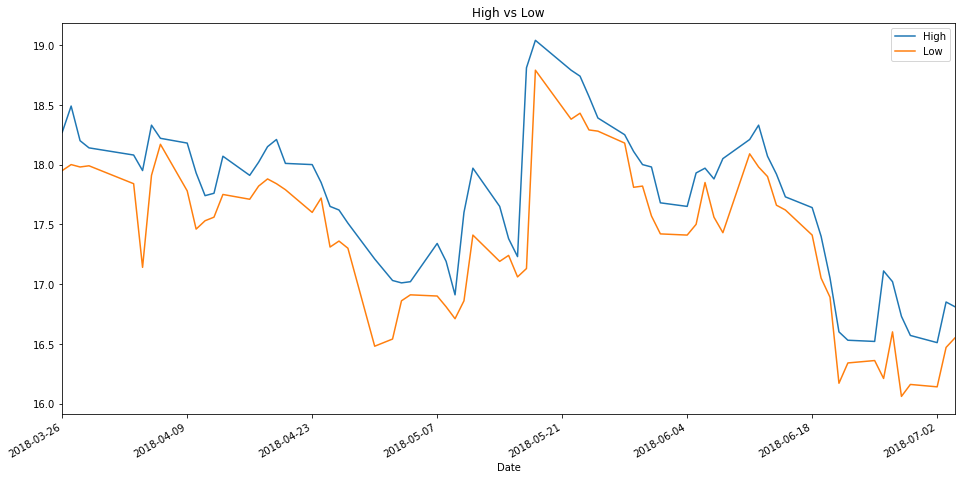

In [47]:
df['High'].plot(figsize = (16,8), title = 'High vs Low')
df['Low'].plot()
plt.legend();

In [58]:
df['Total Cap'] = df['High'] * df['Volume']

In [60]:
df.head()

,High,Low,Last,Previous Day Price,Volume,Total Cap
Date,,,,,,
2018-03-26,18.27,17.95,17.95,18.30,1880.0,34347.60
2018-03-27,18.49,18.00,18.49,17.95,4455.0,82372.95
2018-03-28,18.20,17.98,18.02,18.49,3700.0,67340.00
2018-03-29,18.14,17.99,18.03,18.02,0.0,0.00
2018-04-03,18.08,17.84,18.03,18.03,1000.0,18080.00


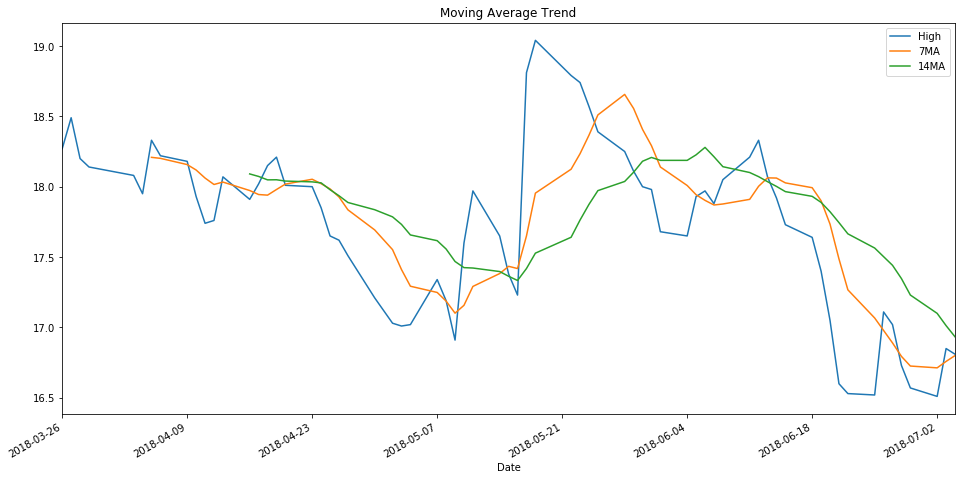

In [99]:
df['7MA'] = df['High'].rolling(7).mean()
df['14MA'] = df['High'].rolling(14).mean()

df[['High','7MA','14MA']].plot(title = 'Moving Average Trend', figsize = (16,8));

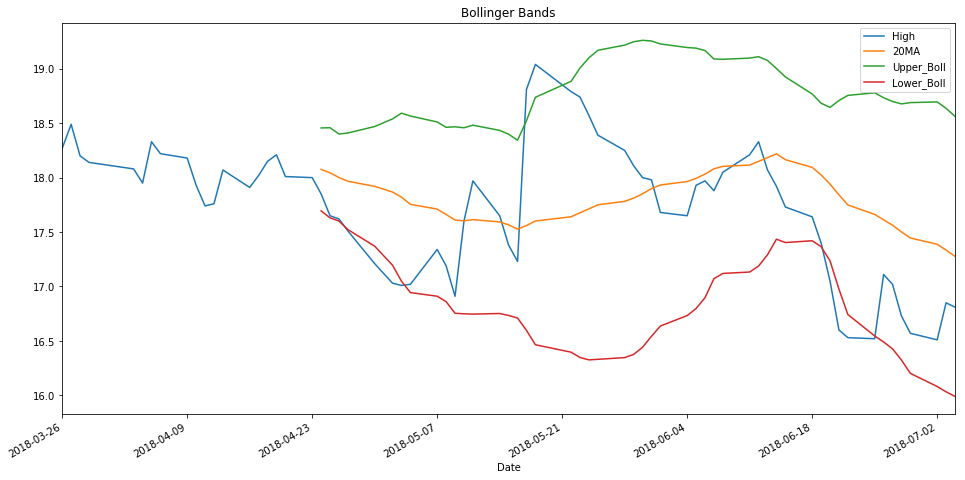

In [98]:
df['20MA'] = df['High'].rolling(20).mean()

df['Upper_Boll'] = (df['High'].rolling(20).mean()) + (2*(df['High'].rolling(20).std()))
df['Lower_Boll'] = (df['High'].rolling(20).mean()) - (2*(df['High'].rolling(20).std()))

df[['High','20MA','Upper_Boll','Lower_Boll']].plot(title = 'Bollinger Bands', figsize = (16,8));

In [67]:
df['Daily Returns'] = df['Last']-df['Previous Day Price']
df.head()

,High,Low,Last,Previous Day Price,Volume,Total Cap,10MA,50MA,7MA,20MA,Upper_Boll,Lower_Boll,Daily Returns
Date,,,,,,,,,,,,,
2018-03-26,18.27,17.95,17.95,18.30,1880.0,34347.60,NaN,NaN,NaN,NaN,NaN,NaN,-0.35
2018-03-27,18.49,18.00,18.49,17.95,4455.0,82372.95,NaN,NaN,NaN,NaN,NaN,NaN,0.54
2018-03-28,18.20,17.98,18.02,18.49,3700.0,67340.00,NaN,NaN,NaN,NaN,NaN,NaN,-0.47
2018-03-29,18.14,17.99,18.03,18.02,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
2018-04-03,18.08,17.84,18.03,18.03,1000.0,18080.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00


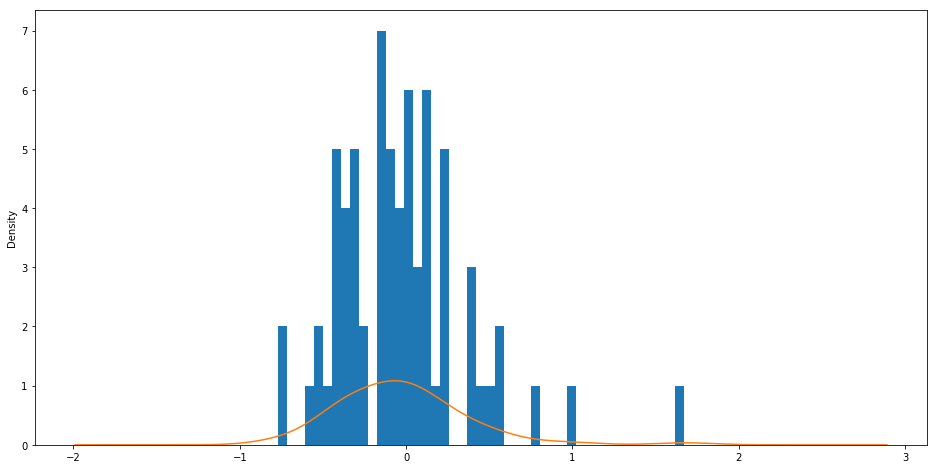

In [83]:
df['Daily Returns'].hist(bins = 45, figsize = (16,8))
df['Daily Returns'].plot(kind = 'kde')

In [91]:
df['Cumulative Returns'] = (1 + df['Daily Returns']).cumprod()

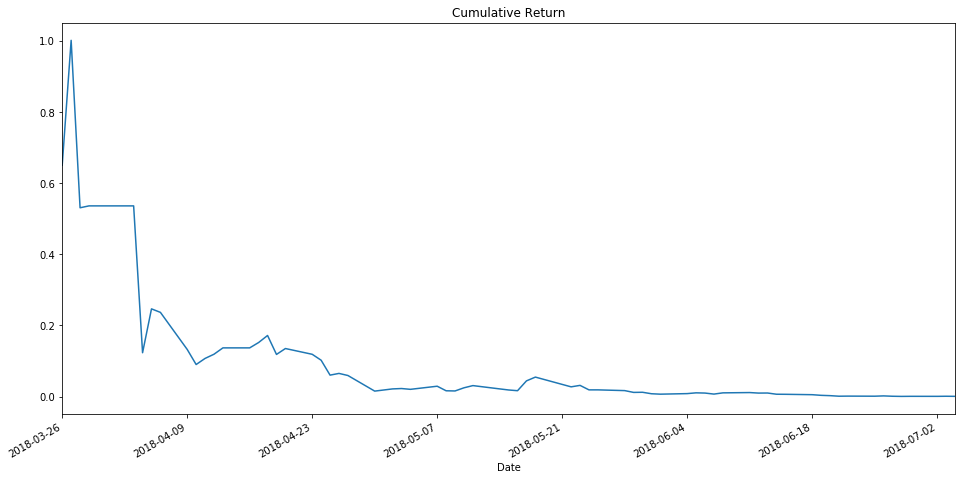

In [96]:
df['Cumulative Returns'].plot(title = 'Cumulative Return',figsize = (16,8))